In [54]:
import pandas as pd
import numpy as np

path = "/content/drive/MyDrive/Colab Notebooks/WS_Classifier/"
data = pd.read_excel(path + "dataset.xlsx", header=None)

In [55]:
data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31
0,Разработка компьютерных игр и мультимедийных п...,Разработка компьютерных игр и мультимедийных п...,Организация и управление работой,13,Специалист должен знать и понимать: • Принципы...,Программирование на языке С#,27,Специалист должен знать и понимать: • Базовые ...,Unity 3D,30,Специалист должен знать и понимать: • Основные...,Оптимизация компьютерных игр и приложений,10,Специалист должен знать и понимать: • Особенно...,Анализ и проектирование,15,Специалист должен знать и понимать: • Важность...,Публикация,5,Специалист должен знать и понимать: • Особенно...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Разработка мобильных приложений(юниоры),Смартфоны продаются и продажи только растут. К...,Организация и управление работой,5,Специалист должен знать и понимать: • Принципы...,"Решение проблем, инновационность и инициативность",5,Специалист должен знать и понимать: • Общие ти...,Анализ и проектирование мобильного приложения,30,Специалист должен знать и понимать: • Важность...,Разработка мобильных приложений,50,Специалист должен знать и понимать: • Важность...,\n \nТестирование мобильных приложений,10,Специалист должен знать и понимать: • Устранен...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Преподавание в младших классах,Высококвалифицированные специалисты в сфере на...,Общекультурное развитие,10,Специалист должен знать и понимать:\n• Основы ...,Культура безопасного труда Организация рабочег...,5,Специалист должен знать и понимать: Участник к...,Общепрофессиональное развитие,40,"Специалист должен знать и понимать: • Понятия,...",Взаимодействие с родителями и сотрудниками обр...,25,Специалист должен знать и понимать: • Основные...,Саморазвитие и самообразование,10,Специалист должен знать и понимать: • Особенно...,Методическое обеспечение образовательного проц...,10,Специалист должен знать и понимать: • Концепту...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Дошкольное воспитание(юниоры),Воспитатель детей дошкольного возраста осущес...,Соблюдение санитарных норм и правил профилакти...,16,Специалист должен знать и понимать:\n• Стандар...,"Поиск, анализ и оценка информации, необходимой...",24,Специалист должен знать и понимать: • основную...,Использование информационно-коммуникационных т...,6,Специалист должен знать и понимать: • компьюте...,"Планирование, организация и проведение меропри...",37.5,Специалист должен знать и понимать:\n• методик...,"Коммуникативные навыки, творческий подход",16.5,Специалист должен знать и понимать: • професси...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Дошкольное воспитание,Воспитатель детей дошкольного возраста осущест...,Соблюдение санитарных норм и правил профилакти...,16,Специалист должен знать и понимать: • Стандарт...,"Поиск, анализ и оценка информации, необходимой...",24,Специалист должен знать и понимать:\n• основну...,Использование информационно-коммуникационных т...,6,Специалист должен знать и понимать: • компьюте...,"Планирование, организация и проведение меропри...",37.5,Специалист должен знать и понимать: • методику...,"Коммуникативные навыки, творческий подход",16.5,Специалист должен знать и понимать: • професси...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Get data and train

### First parsing

#### Making headers for file

In [56]:
headers = {"Name_Competiion": [], "Description_Competition": [],
           "Name_Group":[], "Weight_Group":[], "Signs_Group": []}
df = pd.DataFrame(headers)

for i in range(27):
  df["column_" + str(i)] = 0

for data_type in df.columns:
  df[data_type] = df[data_type].astype(str)

data.columns = df.columns

In [57]:
data

,Name_Competiion,Description_Competition,Name_Group,Weight_Group,Signs_Group,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,column_10,column_11,column_12,column_13,column_14,column_15,column_16,column_17,column_18,column_19,column_20,column_21,column_22,column_23,column_24,column_25,column_26
0,Разработка компьютерных игр и мультимедийных п...,Разработка компьютерных игр и мультимедийных п...,Организация и управление работой,13,Специалист должен знать и понимать: • Принципы...,Программирование на языке С#,27,Специалист должен знать и понимать: • Базовые ...,Unity 3D,30,Специалист должен знать и понимать: • Основные...,Оптимизация компьютерных игр и приложений,10,Специалист должен знать и понимать: • Особенно...,Анализ и проектирование,15,Специалист должен знать и понимать: • Важность...,Публикация,5,Специалист должен знать и понимать: • Особенно...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Разработка мобильных приложений(юниоры),Смартфоны продаются и продажи только растут. К...,Организация и управление работой,5,Специалист должен знать и понимать: • Принципы...,"Решение проблем, инновационность и инициативность",5,Специалист должен знать и понимать: • Общие ти...,Анализ и проектирование мобильного приложения,30,Специалист должен знать и понимать: • Важность...,Разработка мобильных приложений,50,Специалист должен знать и понимать: • Важность...,\n \nТестирование мобильных приложений,10,Специалист должен знать и понимать: • Устранен...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Преподавание в младших классах,Высококвалифицированные специалисты в сфере на...,Общекультурное развитие,10,Специалист должен знать и понимать:\n• Основы ...,Культура безопасного труда Организация рабочег...,5,Специалист должен знать и понимать: Участник к...,Общепрофессиональное развитие,40,"Специалист должен знать и понимать: • Понятия,...",Взаимодействие с родителями и сотрудниками обр...,25,Специалист должен знать и понимать: • Основные...,Саморазвитие и самообразование,10,Специалист должен знать и понимать: • Особенно...,Методическое обеспечение образовательного проц...,10,Специалист должен знать и понимать: • Концепту...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Дошкольное воспитание(юниоры),Воспитатель детей дошкольного возраста осущес...,Соблюдение санитарных норм и правил профилакти...,16,Специалист должен знать и понимать:\n• Стандар...,"Поиск, анализ и оценка информации, необходимой...",24,Специалист должен знать и понимать: • основную...,Использование информационно-коммуникационных т...,6,Специалист должен знать и понимать: • компьюте...,"Планирование, организация и проведение меропри...",37.5,Специалист должен знать и понимать:\n• методик...,"Коммуникативные навыки, творческий подход",16.5,Специалист должен знать и понимать: • професси...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Дошкольное воспитание,Воспитатель детей дошкольного возраста осущест...,Соблюдение санитарных норм и правил профилакти...,16,Специалист должен знать и понимать: • Стандарт...,"Поиск, анализ и оценка информации, необходимой...",24,Специалист должен знать и понимать:\n• основну...,Использование информационно-коммуникационных т...,6,Специалист должен знать и понимать: • компьюте...,"Планирование, организация и проведение меропри...",37.5,Специалист должен знать и понимать: • методику...,"Коммуникативные навыки, творческий подход",16.5,Специалист должен знать и понимать: • професси...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,Управление локомотивом,"Машинисты локомотивов - это специалисты, котор...",Техника безопасност,16,Специалист должен знать:  общие требования ох...,Приемка локомотива,10,Специалист должен: знать конструкцию локомоти...,Управление локомотивом,30,Специалист должен:  зарядить тормозную магист...,Коммуни

#### Sorting data

In [58]:
index = -1

for i in data.itertuples():
  index = index + 1
  for q, w, e in zip(range(2,28,3), range(3,28,3), range(4,28,3)):
    if pd.isnull(data.iloc[index][q]):
      break
    else:
      df.loc[len(df)] = np.nan
      df = df.shift()
      df.at[0, "Name_Competiion"] = data.iloc[index][0]
      df.at[0, "Description_Competition"] = data.iloc[index][1]
      df.at[0, "Name_Group"] = data.iloc[index][q]
      df.at[0, "Weight_Group"] = data.iloc[index][w]
      df.at[0, "Signs_Group"] = data.iloc[index][e]

df.drop(df.iloc[:,5:], inplace=True, axis=1)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 981 entries, 0 to 980
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Name_Competiion          981 non-null    object
 1   Description_Competition  981 non-null    object
 2   Name_Group               981 non-null    object
 3   Weight_Group             977 non-null    object
 4   Signs_Group              978 non-null    object
dtypes: object(5)
memory usage: 86.0+ KB


#### Cast Types and dropping useless

In [60]:
df["Weight_Group"] = pd.to_numeric(df["Weight_Group"], errors='coerce')
df = df.dropna(subset=["Weight_Group"])
df = df.dropna(subset=["Signs_Group"])

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 960 entries, 0 to 980
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name_Competiion          960 non-null    object 
 1   Description_Competition  960 non-null    object 
 2   Name_Group               960 non-null    object 
 3   Weight_Group             960 non-null    float64
 4   Signs_Group              960 non-null    object 
dtypes: float64(1), object(4)
memory usage: 45.0+ KB


### Cleaning Data

In [62]:
from nltk.corpus import stopwords
import nltk

nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [63]:
def cleaning(df):
  df = df.str.lower()
  df = df.replace(r'[^a-zA-ZА-Яа-я]', ' ', regex=True)
  df = df.str.strip()
  stop_words = stopwords.words("russian")
  df = df.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))
  return df

In [64]:
df["Signs_Group"] = cleaning(df["Signs_Group"])

df = df.reset_index()

In [65]:
df["Signs_Group"][0]

'участнику необходимо знать порядок действий случае внештатной ситуации характер причины нарушения запланированной работы соответствии договором принципы правила процедуры управления обеспечения качества принципы отражения обзора последующих ошибок жалоб стратегии методы постоянного повышения качества wsr tdd ru дата января года версия союз ворлдскиллс россия экспедирование грузов человек должен способен работать возражениями клиента качеству оказанных услуг работать внештатными ситуациями соответствующим образом адекватно реагировать нарушения договорных обязательств объяснить записать линию предпринятых действий определять порядок действий аналогичных ситуациях последующих перевозках'

In [66]:
df.to_csv(path + "result_dataset.csv", 
          encoding="utf-16", index=True)

#### Making dictionaties

In [67]:
analize = pd.DataFrame()
analize["Name_Competiion"], analize["Signs_Group"] = df["Name_Competiion"], df["Signs_Group"]
analize.head(10)

,Name_Competiion,Signs_Group
0,Экспедирование грузов,участнику необходимо знать порядок действий сл...
1,Экспедирование грузов,участнику необходимо знать процедуру документо...
2,Экспедирование грузов,участнику необходимо знать принципы правила це...
3,Экспедирование грузов,участнику необходимо знать общие конкретные ва...
4,Экспедирование грузов,участнику необходимо знать правила общения раб...
5,Экспедирование грузов,участнику необходимо знать содержание договоро...
6,Холодильная Техника и Системы Кондиционировани...,специалист должен знать понимать электрические...
7,Холодильная Техника и Системы Кондиционировани...,специалист должен знать понимать знание основ ...
8,Холодильная Техника и Системы Кондиционировани...,специалист должен знать понимать нормы техники...
9,Холодильная Техника и Системы Кондиционировани...,специалист должен знать понимать стандартные е...


In [68]:
from sklearn.feature_extraction.text import CountVectorizer
import re
import csv


stop_words = stopwords.words("russian")
cnt_vctrzer = CountVectorizer(stop_words=stop_words)
cnt_vctrzer.fit(analize["Signs_Group"])

# Added toarray()
vect_dict = cnt_vctrzer.fit_transform(analize["Signs_Group"]).toarray()

my_dict = cnt_vctrzer.vocabulary_

with open(path + "mydictfile.csv", "w",
          encoding="utf-16") as file:
          w = csv.DictWriter(file, my_dict.keys())
          w.writeheader()
          w.writerow(my_dict)


In [69]:
df_dict = pd.read_csv(path + "mydictfile.csv", encoding="utf-16")
df_dict

,участнику,необходимо,знать,порядок,действий,случае,внештатной,ситуации,характер,причины,нарушения,запланированной,работы,соответствии,договором,принципы,правила,процедуры,управления,обеспечения,качества,отражения,обзора,последующих,ошибок,жалоб,стратегии,методы,постоянного,повышения,wsr,tdd,ru,дата,января,года,версия,союз,ворлдскиллс,россия,...,воспитательное,возраст,книгой,демонстрационного,стенда,доо,возрастными,корригирующие,упражнения,дневного,сна,ост,издания,книжные,журнальные,подростков,принят,введен,мптр,санпин,клеем,конструкторами,lego,оздоровительной,материальной,пространственной,совместную,уместного,синтезировать,неоднородную,опросы,анкеты,совместная,уместные,ос,windows,android,ios,билд,программировани
0,10522,4800,2593,6713,1773,8904,1041,8789,10772,7302,4660,2463,7778,9111,1991,7232,6870,7653,10359,5015,3198,5770,5030,6745,5893,2191,9506,4263,6780,6308,217,184,164,1729,11420,1570,856,9202,1162,8396,...,1169,1131,3302,1815,9432,2045,1137,3642,10376,1966,8948,5609,2674,3303,2254,6427,7233,807,4471,8507,3265,3507,102,5315,4130,7569,9023,10331,8758,4816,5444,432,9019,10333,5532,214,5,88,648,7374


#### Testing wordcloud

In [70]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

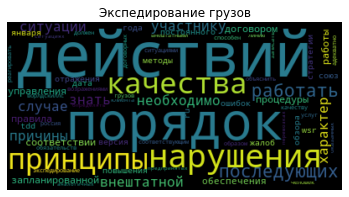

In [71]:
text = df["Signs_Group"][0]

# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.title(df["Name_Competiion"][0])
plt.axis("off")
plt.show()

#### Making wordclouds for all competitions
##### WARNING it takes long time 

In [72]:
def all_metrics():
  shift = 0

  for i in pd.value_counts(df["Name_Competiion"]):
    try:
      title = df["Name_Competiion"][shift]
    except KeyError:
      pass
    text = []
    for j in range(i):
        try:
          text.append(df["Signs_Group"][shift + j])
        except KeyError:
          pass
    text = ' '.join(text)
    shift += i
    try:
      wordcloud = WordCloud().generate(text)
    except ValueError:
      break

    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title)
    plt.axis("off")
    plt.show()
  

In [73]:
all_metrics()

Output hidden; open in https://colab.research.google.com to view.

### Classify competition

In [74]:
x = vect_dict
y = analize["Name_Competiion"].array

In [75]:
from sklearn.model_selection import  train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True)

##### Training models

- SVM (Vector Methods)
- Random Forest
- NaiveBayes (Naive Bayes Classifier)

In [76]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [77]:
svc = SVC()
svc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [78]:
rfc = RandomForestClassifier(n_jobs = -1)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [79]:
nbc = GaussianNB()
nbc.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [80]:
svc.score(x_train, y_train)

0.5791666666666667

In [81]:
rfc.score(x_train, y_train)

0.7722222222222223

In [82]:
nbc.score(x_train, y_train)

0.7708333333333334

In [83]:
from sklearn.metrics import classification_report

In [84]:
print(classification_report(y_test, svc.predict(x_test)))

                                                                                      precision    recall  f1-score   support

                                               3D моделирование для компьютерных игр       0.00      0.00      0.00         2
                                                           «ОХРАНА ОКРУЖАЮЩЕЙ СРЕДЫ»       0.00      0.00      0.00         1
                                                                      «ОХРАНА ТРУДА»       0.50      1.00      0.67         1
                                                                    «СТОЛЯРНОЕ ДЕЛО»       0.00      0.00      0.00         1
                                                             Администрирование отеля       0.00      0.00      0.00         2
                                                     Администрирование отеля(Юниоры)       0.00      0.00      0.00         1
                                                                         Архитектура       0.00      0.00      0.00  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [85]:
print(classification_report(y_test, rfc.predict(x_test)))

                                                                                      precision    recall  f1-score   support

                                               3D моделирование для компьютерных игр       0.40      1.00      0.57         2
                                                           «ОХРАНА ОКРУЖАЮЩЕЙ СРЕДЫ»       0.50      1.00      0.67         1
                                                                      «ОХРАНА ТРУДА»       0.33      1.00      0.50         1
                                                                    «СТОЛЯРНОЕ ДЕЛО»       0.00      0.00      0.00         1
                                                             Администрирование отеля       0.00      0.00      0.00         2
                                                     Администрирование отеля(Юниоры)       0.00      0.00      0.00         1
                                                                         Архитектура       1.00      0.50      0.67  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
print(classification_report(y_test, nbc.predict(x_test)))

                                                                                      precision    recall  f1-score   support

                                               3D моделирование для компьютерных игр       1.00      0.50      0.67         2
                                                           «ОХРАНА ОКРУЖАЮЩЕЙ СРЕДЫ»       1.00      1.00      1.00         1
                                                                      «ОХРАНА ТРУДА»       1.00      1.00      1.00         1
                                                                    «СТОЛЯРНОЕ ДЕЛО»       0.00      0.00      0.00         1
                                                             Администрирование отеля       0.00      0.00      0.00         2
                                                     Администрирование отеля(Юниоры)       0.00      0.00      0.00         1
                                                                         Архитектура       1.00      0.50      0.67  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [87]:
# 40s / value
args = [1.0, 10.0, 100.0]
train_score  = list()
test_score = list()
for i in args:
  svc = SVC(C=i)
  svc.fit(x_train, y_train)
  train_score.append(svc.score(x_train, y_train))
  test_score.append(svc.score(x_test, y_test))
print(train_score)
print(test_score)

[0.5791666666666667, 0.7666666666666667, 0.7722222222222223]
[0.029166666666666667, 0.125, 0.125]


In [88]:
# 10 s / value
args = [5, 10, 20, 50, 100, 1000]
train_score  = list()
test_score = list()
for i in args:
  rfc = RandomForestClassifier(n_estimators=i)
  rfc.fit(x_train, y_train)
  train_score.append(rfc.score(x_train, y_train))
  test_score.append(rfc.score(x_test, y_test))
print(train_score)
print(test_score)

[0.7472222222222222, 0.7680555555555556, 0.7708333333333334, 0.7722222222222223, 0.7722222222222223, 0.7722222222222223]
[0.09583333333333334, 0.14583333333333334, 0.16666666666666666, 0.225, 0.19583333333333333, 0.25]


#### Results
- svm = 11%
- rfc = 22%
- nbc = 19%

## Feature Engineereng

In [89]:
df["count_description_len"] = np.nan
df["count_title_len"] = np.nan
df["count_titlefeat_len"] = np.nan

for r in range(len(df)):
  df["count_description_len"][r] = len(df["Description_Competition"][r])

for r in range(len(df)):
  df["count_title_len"][r] = len(df["Name_Group"][r])

for r in range(len(df)):
  df["count_titlefeat_len"][r] = len(df["Signs_Group"][r])

df["count_description_len"] = df["count_description_len"].astype(int)
df["count_title_len"] = df["count_title_len"].astype(int)
df["count_titlefeat_len"] = df["count_titlefeat_len"].astype(int)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [90]:
df = df.drop(["index"], axis=1)

In [91]:
df

,Name_Competiion,Description_Competition,Name_Group,Weight_Group,Signs_Group,count_description_len,count_title_len,count_titlefeat_len
0,Экспедирование грузов,Экспедитор управляет перемещением грузов из од...,Управление внештатными ситуациями,15.0,участнику необходимо знать порядок действий сл...,1758,33,693
1,Экспедирование грузов,Экспедитор управляет перемещением грузов из од...,Коммерческие сделки,15.0,участнику необходимо знать процедуру документо...,1758,19,471
2,Экспедирование грузов,Экспедитор управляет перемещением грузов из од...,Калькуляция затрат и цен,15.0,участнику необходимо знать принципы правила це...,1758,24,616
3,Экспедирование грузов,Экспедитор управляет перемещением грузов из од...,Процесс перевозки,25.0,участнику необходимо знать общие конкретные ва...,1758,17,584
4,Экспедирование грузов,Экспедитор управляет перемещением грузов из од...,Отношения с клиентом,15.0,участнику необходимо знать правила общения раб...,1758,20,771
...,...,...,...,...,...,...,...,...
955,Разработка компьютерных игр и мультимедийных п...,Разработка компьютерных игр и мультимедийных п...,Анализ и проектирование,15.0,специалист должен знать понимать важность прин...,1014,24,676
956,Разработка компьютерных игр и мультимедийных п...,Разработка компьютерных игр и мультимедийных п...,Оптимизация компьютерных игр и приложений,10.0,специалист должен знать понимать особенности о...,1014,41,432
957,Разработка компьютерных игр и мультимедийных п...,Разработка компьютерных игр и мультимедийных п...,Unity 3D,30.0,специалист должен знать понимать основные прин...,1014,8,265
958,Разработка компьютерных игр и мультимедийных п...,Разработка компьютерных игр и мультимедийных п...,Программирование на языке С#,27.0,специалист должен знать понимать базовые алгор...,1014,28,291


In [92]:
# Трансформаторы для получения данных
from sklearn.base import BaseEstimator, TransformerMixin
# Конвеер для объединения шагов выполнения классификации
from sklearn.pipeline import Pipeline
# Функция стандартизации числовых значений
from sklearn.preprocessing import StandardScaler
# Функция преобразования текстовых данных под модель
from sklearn.feature_extraction.text import TfidfVectorizer

# Класс необходимый для получения и работы с текстовыми признаками
class TextSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.key]
    
# Класс необходимый для получения работы с числовыми признаками
class NumericalSelector(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[[self.key]]

#### Making Pipelines

In [93]:
dictionary = Pipeline([
                       ("selector", TextSelector(key="Description_Competition")),
                       ("tfidf", TfidfVectorizer(stop_words=stop_words))])
d = dictionary.fit_transform(df).todense()

In [94]:
title = Pipeline([
                       ("selector", TextSelector(key="Name_Group")),
                       ("tfidf", TfidfVectorizer(stop_words=stop_words))])
title.fit_transform(df).todense()

matrix([[0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        ...,
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.8056436],
        [0.       , 0.       , 0.       , ..., 0.       , 0.       ,
         0.       ]])

In [95]:
ves_title = Pipeline([
                       ("selector", NumericalSelector(key="Weight_Group")),
                       ("tfidf", StandardScaler())])
ves_title.fit_transform(df)

array([[-0.0640027 ],
       [-0.0640027 ],
       [-0.0640027 ],
       [ 0.84289902],
       [-0.0640027 ],
       [-0.0640027 ],
       [ 0.38944816],
       [ 0.38944816],
       [ 1.29634988],
       [-0.0640027 ],
       [-0.97090442],
       [-0.51745356],
       [ 0.38944816],
       [ 0.38944816],
       [ 1.29634988],
       [-0.0640027 ],
       [-0.97090442],
       [-0.51745356],
       [ 0.66151868],
       [ 2.29394178],
       [-0.51745356],
       [-0.60814373],
       [ 0.11737764],
       [-0.51745356],
       [ 0.75220885],
       [-0.51745356],
       [ 1.29634988],
       [-0.51745356],
       [ 0.02668747],
       [-0.51745356],
       [ 4.47050591],
       [-0.69883391],
       [-0.78952408],
       [-0.51745356],
       [-0.24538304],
       [ 0.48013833],
       [ 0.02668747],
       [ 0.11737764],
       [ 1.5684204 ],
       [-0.97090442],
       [ 0.38944816],
       [-0.97090442],
       [ 0.38944816],
       [ 0.84289902],
       [ 0.38944816],
       [-0

In [96]:
title_feat = Pipeline([
                       ("selector", TextSelector(key="Signs_Group")),
                       ("tfidf", TfidfVectorizer(stop_words=stop_words))])
title_feat.fit_transform(df).todense()

matrix([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

In [97]:
count_desc = Pipeline([
                       ("selector", NumericalSelector(key="count_description_len")),
                       ("tfidf", StandardScaler())])
count_desc.fit_transform(df)

array([[-4.42650326e-01],
       [-4.42650326e-01],
       [-4.42650326e-01],
       [-4.42650326e-01],
       [-4.42650326e-01],
       [-4.42650326e-01],
       [-1.36089227e+00],
       [-1.36089227e+00],
       [-1.36089227e+00],
       [-1.36089227e+00],
       [-1.36089227e+00],
       [-1.36089227e+00],
       [-1.36089227e+00],
       [-1.36089227e+00],
       [-1.36089227e+00],
       [-1.36089227e+00],
       [-1.36089227e+00],
       [-1.36089227e+00],
       [-1.23410572e+00],
       [-1.23410572e+00],
       [-1.23410572e+00],
       [-1.23410572e+00],
       [-1.23410572e+00],
       [-9.24823396e-01],
       [-9.24823396e-01],
       [-9.24823396e-01],
       [-9.24823396e-01],
       [-9.24823396e-01],
       [-9.24823396e-01],
       [-4.23440244e-01],
       [-4.23440244e-01],
       [-4.23440244e-01],
       [-4.23440244e-01],
       [-4.23440244e-01],
       [ 7.82610755e-03],
       [ 7.82610755e-03],
       [ 7.82610755e-03],
       [ 7.82610755e-03],
       [ 7.8

In [98]:
count_title = Pipeline([
                       ("selector", NumericalSelector(key="count_title_len")),
                       ("tfidf", StandardScaler())])
count_title.fit_transform(df)

array([[-3.04448376e-01],
       [-8.45260718e-01],
       [-6.52113453e-01],
       [-9.22519624e-01],
       [-8.06631265e-01],
       [-5.74854547e-01],
       [ 1.20475607e-01],
       [-2.27189470e-01],
       [-7.26716584e-02],
       [-4.58966188e-01],
       [-1.11566689e+00],
       [-3.43077829e-01],
       [ 1.20475607e-01],
       [-2.27189470e-01],
       [-7.26716584e-02],
       [-4.58966188e-01],
       [-1.11566689e+00],
       [-3.43077829e-01],
       [-3.04448376e-01],
       [-4.20336735e-01],
       [-1.88560017e-01],
       [-1.11566689e+00],
       [ 6.99917401e-01],
       [-4.58966188e-01],
       [-1.46333197e+00],
       [-1.11566689e+00],
       [-7.29372359e-01],
       [-8.83890171e-01],
       [-8.45260718e-01],
       [-3.43077829e-01],
       [-9.61149077e-01],
       [-8.45260718e-01],
       [-7.68001812e-01],
       [-3.43077829e-01],
       [-6.90742906e-01],
       [ 9.70323572e-01],
       [ 1.59105060e-01],
       [ 1.93605990e+00],
       [ 9.7

In [99]:
count_titlefeat = Pipeline([
                       ("selector", NumericalSelector(key="count_titlefeat_len")),
                       ("tfidf", StandardScaler())])
count_titlefeat.fit_transform(df)

array([[-2.03405484e-01],
       [-5.60537675e-01],
       [-3.27275658e-01],
       [-3.78754172e-01],
       [-7.79266060e-02],
       [-4.02884726e-01],
       [ 1.85900778e-01],
       [ 2.75988178e-01],
       [ 1.03690496e+00],
       [ 1.23638420e+00],
       [ 2.26118367e-01],
       [ 1.73829972e+00],
       [ 1.85900778e-01],
       [ 2.75988178e-01],
       [ 1.03690496e+00],
       [ 1.23638420e+00],
       [ 2.26118367e-01],
       [ 1.73829972e+00],
       [ 3.33901506e-01],
       [-4.89754718e-01],
       [-1.35784635e-02],
       [ 2.61509846e-01],
       [ 1.01277441e+00],
       [-2.56492701e-01],
       [-7.39103770e-01],
       [ 1.21225365e+00],
       [ 2.77591351e+00],
       [ 2.50248921e-01],
       [-6.10407485e-01],
       [-6.42581557e-01],
       [ 1.29268883e+00],
       [ 1.63051658e+00],
       [ 1.47291893e-01],
       [ 1.42621123e+00],
       [-3.17623437e-01],
       [-4.70450275e-01],
       [ 1.60960343e+00],
       [ 2.37379292e-01],
       [ 3.6

In [100]:
from sklearn.pipeline import FeatureUnion
feat = FeatureUnion([ ("title", title),
                      ("ves_title", ves_title),
                      ("title_feat", title_feat),
                      ("count_desc", count_desc),
                      ("count_title", count_title),
                      ("count_titlefeat", count_titlefeat)
                      ])

y = df["Name_Competiion"]
x = feat.fit_transform(df.drop(columns=["Name_Competiion"], axis=1)).todense()

#### Testing after feature transform

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x, y, shuffle=True)

In [102]:
sc = SVC()
sc.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [103]:
sc.score(x_test, y_test)

0.041666666666666664

In [104]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [105]:
rf.score(x_test, y_test)

0.2375

In [106]:
print(classification_report(y_test, rf.predict(x_test)))

                                                                                      precision    recall  f1-score   support

                                               3D моделирование для компьютерных игр       0.75      1.00      0.86         3
                                                           «ОХРАНА ОКРУЖАЮЩЕЙ СРЕДЫ»       0.00      0.00      0.00         1
                                                                      «ОХРАНА ТРУДА»       0.44      1.00      0.62         4
                                                             Администрирование отеля       0.00      0.00      0.00         1
                                                     Администрирование отеля(Юниоры)       0.00      0.00      0.00         2
                                                                         Архитектура       1.00      1.00      1.00         2
                                                       Архитектурная обработка камня       0.00      0.00      0.00  

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Results
We get 0.5% of accuracy by feature engineering

I think that calls success